In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0-rc2


In [0]:
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [0]:
import csv
time_step = []
data = []
import pandas as pd

dataset = pd.read_csv('international-airline-passengers.csv')
dataset.describe(
    
)

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [0]:
series=np.array(dataset["International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"])
series

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.,  nan])

In [0]:
time=np.arange(0,len(series))

len(time),len(series)

(145, 145)

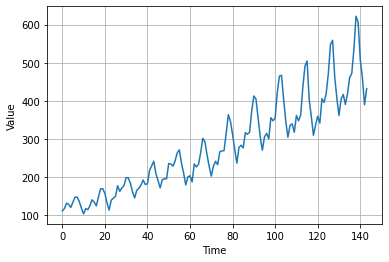

In [0]:
plot_series(time,series)

In [0]:
split_time = 100
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_test = series[split_time:]


In [0]:
from sklearn.preprocessing import StandardScaler
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  #  ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    
    return ds.batch(batch_size).prefetch(1)

scaler = StandardScaler()
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
x_train = scaler.fit_transform(x_train)

x_test = scaler.fit(x_test)
  
train=windowed_dataset(x_train,10,3,5)


In [0]:
model = tf.keras.models.Sequential([

  tf.keras.layers.LSTM(10, return_sequences=True),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),

 
])

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
history = model.fit(train, epochs=100)


Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

30/30 [==============================] - 0s 5ms/step - loss: 1.0264
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.8837
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.8250
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.7588
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.6841
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6187
Epoch 7/100
30/30 [=========

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(3).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [0]:
series = np.array(series).reshape(-1,1)


series = scaler.fit_transform(series)
print(series)

print(x_validation)


[[-1.40777884]
 [-1.35759023]
 [-1.24048348]
 [-1.26557778]
 [-1.33249593]
 [-1.21538918]
 [-1.10664719]
 [-1.10664719]
 [-1.20702441]
 [-1.34922546]
 [-1.47469699]
 [-1.35759023]
 [-1.38268454]
 [-1.29067209]
 [-1.16520057]
 [-1.21538918]
 [-1.29903686]
 [-1.09828242]
 [-0.9226223 ]
 [-0.9226223 ]
 [-1.02299951]
 [-1.23211871]
 [-1.3910493 ]
 [-1.17356534]
 [-1.1317415 ]
 [-1.08991766]
 [-0.85570415]
 [-0.98117567]
 [-0.90589276]
 [-0.85570415]
 [-0.68004402]
 [-0.68004402]
 [-0.80551554]
 [-0.98954044]
 [-1.12337673]
 [-0.95608137]
 [-0.91425753]
 [-0.83897462]
 [-0.73023263]
 [-0.83060985]
 [-0.81388031]
 [-0.52111343]
 [-0.42073621]
 [-0.320359  ]
 [-0.59639634]
 [-0.74696217]
 [-0.90589276]
 [-0.72186786]
 [-0.70513833]
 [-0.70513833]
 [-0.37054761]
 [-0.37891237]
 [-0.42910098]
 [-0.31199423]
 [-0.1363341 ]
 [-0.06941596]
 [-0.36218284]
 [-0.57966681]
 [-0.83897462]
 [-0.66331449]
 [-0.63822018]
 [-0.77205647]
 [-0.37891237]
 [-0.44583052]
 [-0.38727714]
 [-0.1363341 ]
 [ 0.18152

In [0]:
rnn_forecast = model_forecast(model, series, 10)
rnn_forecast.shape


(136, 10, 1)

In [0]:

x_pred=[]
for x in rnn_forecast[0]:
  x_pred.append(x)
for x in rnn_forecast[1:]:
  x_pred.append(x[9])

len(x_pred)


145

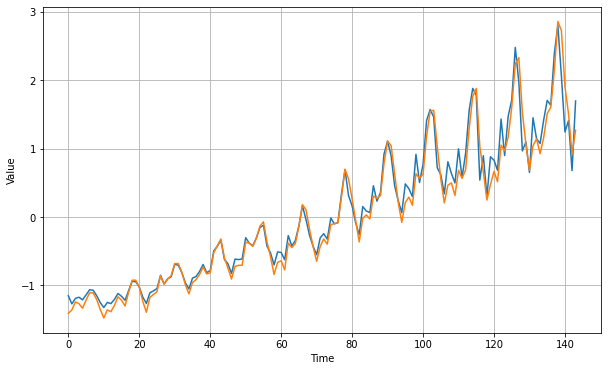

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time, x_pred)
plot_series(time, series)